# ClassifAI Package 
## Object Oriented Demo ✨


#### The ClassifAI package is a tool to help in the creation and serving of vector databases, for classification tasks.

#### This Notebook is a quick guide that shows how the package can separate three main concerns involved in making a live, searchable, vector database for your applications:

1. **Vectorising** - The creation of vectors from text  
2. **Indexing** - The creation of a vector store, converting many texts to vectors 
3. **Serving** - Wrapping the Vector Store in an API to make it searchable from endpoints

#### We provide three key modules in this package, that let you build Rest-API search systems from your text data using these three classes together in one development process.

## Setup

In [ ]:
!pip install ipykernel
!pip install ipywidgets

#or use the corresponding uv commands

In [ ]:
!pip install git+https://github.com/datasciencecampus/classifAI_API@oo-prototype


In [ ]:
#if you have a gcloud account that has Vertex AI embedding models enabled, you can run this line to use those embedding models in this demo
!gcloud auth application-default login

## Vectorising

#### We provide several vectoriser classes - that you can use to convert text to embeddings/vectors

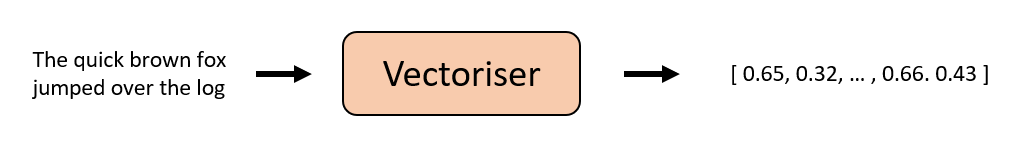

In [12]:
from IPython.display import Image, display
display(Image(filename='./files/vectoriser.png'))

In [1]:
from classifAI_API.vectorisers import HuggingFaceVectoriser

#But this also works with many different huggingface models!
vectoriser = HuggingFaceVectoriser(model_name="sentence-transformers/all-MiniLM-L6-v2")

my_first_vector = vectoriser.transform("ClassifAI is a great tool for building AI applications.")

my_first_vector  

array([[-4.22041267e-01, -4.10377234e-01, -4.79407161e-01,
        -7.37738162e-02,  1.84127182e-01,  7.83520713e-02,
        -1.13779500e-01,  2.69262046e-01, -2.63399690e-01,
        -2.31431574e-02, -2.26780459e-01, -1.37488946e-01,
         7.27206469e-02,  8.67812857e-02,  3.72249275e-01,
         1.19233511e-01, -1.69905335e-01,  1.92818478e-01,
        -4.00653422e-01, -3.09419453e-01,  2.70585865e-01,
         2.20776826e-01,  1.22355677e-01, -1.28483042e-01,
        -2.09892988e-01,  3.53233993e-01,  2.28323430e-01,
        -3.78446400e-01,  2.30527714e-01, -2.21412882e-01,
        -2.15664342e-01, -5.41087613e-02,  3.89351815e-01,
         2.29717374e-01, -4.39128220e-01,  5.05839765e-01,
        -4.14097816e-01,  6.41432777e-02, -2.26554405e-02,
        -2.16778591e-01, -5.79406857e-01,  2.08568498e-01,
         1.58676267e-01, -5.79368114e-01,  5.55266500e-01,
         1.76069494e-02, -4.18267787e-01, -2.87758768e-01,
         5.84228516e-01, -5.10404352e-03, -5.70754349e-0

#### Huggingface models might be the most accessible, but we also provide a GCP_Vectoriser if you have a vertex account set up!

In [ ]:
from classifAI_API.vectorisers import GcpVectoriser

my_gcp_vectoriser = GcpVectoriser(project_id="<YOUR PROJECT ID>",)

my_second_vector = my_gcp_vectoriser.transform("The quick brown fox jumps over the log")

my_second_vector.shape

#### Both of these Vectoriser classes accept strings (or lists of strings) and return numpy arrays:

## Indexing

#### We then provide an Indexer Class that allows you to create and store vectors. You pass it **any** of the Vectoriser models

#### its job is to iterate over a csv file you provide and convert it to vectors and store it:

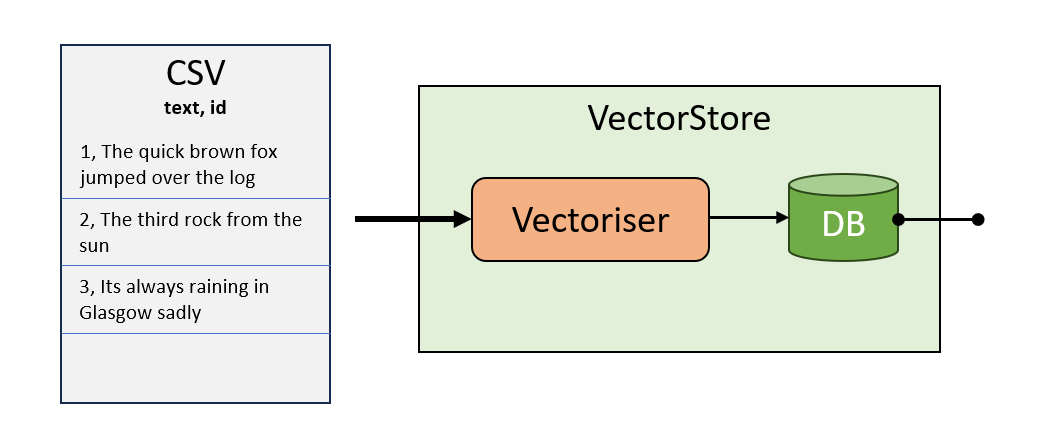

In [6]:
from IPython.display import Image, display
display(Image(filename='./files/VectorStore.png'))

In [2]:
from classifAI_API.indexers import VectorStore


my_vector_store = VectorStore(
    file_name="data/testdata.csv",
    data_type="csv",
    vectoriser=vectoriser, #or switch to the GcpVectoriser if you have it :)
    batch_size=10
)

INFO - Processing file: data/testdata.csv in batches of size 10...

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Processing batches: 9it [00:00, 65.23it/s]
INFO - 
Finished creating vectors, attempting to create parquet file and vector store object...
INFO - Gathering metadata and saving vector store / metadata...
INFO - Vector Store created - files saved to classifai_vector_stores/testdata


#### Once this is created you can search the vector store by calling the .search() method on the object!

`You might also notice that the vector store and its metadata are now stored in the "classifai_vector_store" folder`

From here you can load existing vector stores in from memory without doing the indexing again - call the class method **VectorStore.from_filespace()**

In [3]:
my_vector_store.search("What colour is snow?")

query_id,query_text,doc_id,doc_text,rank,score
i64,str,str,str,i64,f64
0,"""What colour is snow?""","""1056""","""The peak is snowy.""",0,21.335527
0,"""What colour is snow?""","""1034""","""The glacier is melting.""",1,17.157963
0,"""What colour is snow?""","""1016""","""Ice is cold.""",2,16.873528
0,"""What colour is snow?""","""1042""","""The tundra is cold.""",3,14.933069
0,"""What colour is snow?""","""1094""","""The glacier is massive.""",4,13.897308
0,"""What colour is snow?""","""1019""","""Leaves fall in autumn.""",5,12.253672
0,"""What colour is snow?""","""1018""","""Mountains touch the sky.""",6,12.063025
0,"""What colour is snow?""","""1089""","""The tundra is barren.""",7,11.201347
0,"""What colour is snow?""","""1079""","""The fjord is majestic.""",8,9.582264


In [ ]:
#or multiple queries at once!    (and specify how many results you want per query)
my_vector_store.search(["What colour is snow?", "what is inside books"], n_results=5)

query_id,query_text,doc_id,doc_text,rank,score
i64,str,str,str,i64,f64
0,"""What colour is snow?""","""1056""","""The peak is snowy.""",0,21.335529
0,"""What colour is snow?""","""1034""","""The glacier is melting.""",1,17.157963
0,"""What colour is snow?""","""1016""","""Ice is cold.""",2,16.873526
0,"""What colour is snow?""","""1042""","""The tundra is cold.""",3,14.933069
0,"""What colour is snow?""","""1094""","""The glacier is massive.""",4,13.897312
1,"""what is inside books""","""1021""","""The forest is dense.""",0,4.33488
1,"""what is inside books""","""1014""","""Stars twinkle in the sky.""",1,4.235991
1,"""what is inside books""","""1087""","""The swamp is eerie.""",2,4.021118
1,"""what is inside books""","""1066""","""The peninsula is surrounded.""",3,3.989768


#### this all seemlessly uses the vector model and the vector database you indexed to bring you the top K search results

## Serving up your VectorStore!

#### So you've created a vectorstore, with you chosen vectoriser, that makes vectors and you can search it.... **how do I host it so others can use it?**

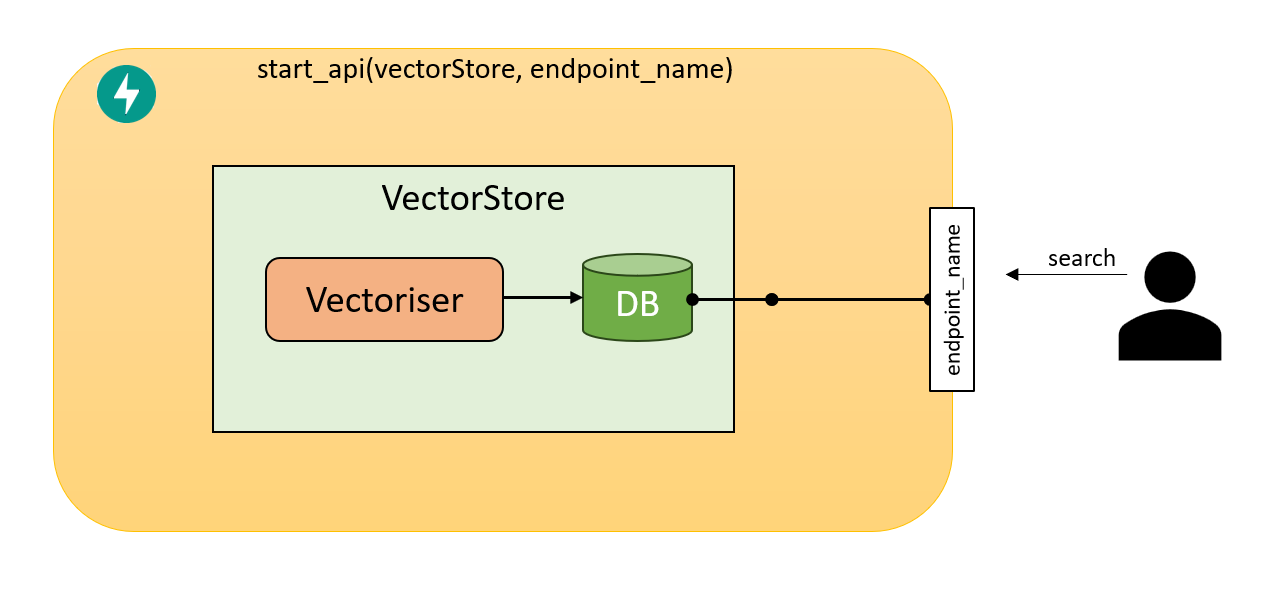

In [10]:
from IPython.display import Image, display
display(Image(filename='./files/servers.png'))

In [ ]:
from classifAI_API.servers import start_api
import nest_asyncio

nest_asyncio.apply() #this line just makes it possible to run the server in a Jupyter notebook, you would not need this in a normal python script.


start_api(vector_stores=[my_vector_store], endpoint_names=["my_endpoint"], port=8000)

INFO - Starting ClassifAI API
INFO - Registering endpoints for: my_endpoint
INFO:     Started server process [7970]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [7970]


## Roundup

#### That's it - you should now have made a running restAPI service that lets you search the texts you indexed in the test CSV.

#### Check out the GitHub repo, where there is a quick start guide in the Readme.md 😊